## Data preprocessing

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE

In [10]:
cd D:\IABAC project\PROJECT

D:\IABAC project\PROJECT


In [11]:
df = pd.read_excel('data\\raw\\INX_Future_Inc_Employee_Performance_CDS_Project2_Data.xls')
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


### Missing values handling

In [12]:
print(f'Percentage of missing values: \n{df.isna().sum()/len(df.index)*100}')

Percentage of missing values: 
EmpNumber                       0.0
Age                             0.0
Gender                          0.0
EducationBackground             0.0
MaritalStatus                   0.0
EmpDepartment                   0.0
EmpJobRole                      0.0
BusinessTravelFrequency         0.0
DistanceFromHome                0.0
EmpEducationLevel               0.0
EmpEnvironmentSatisfaction      0.0
EmpHourlyRate                   0.0
EmpJobInvolvement               0.0
EmpJobLevel                     0.0
EmpJobSatisfaction              0.0
NumCompaniesWorked              0.0
OverTime                        0.0
EmpLastSalaryHikePercent        0.0
EmpRelationshipSatisfaction     0.0
TotalWorkExperienceInYears      0.0
TrainingTimesLastYear           0.0
EmpWorkLifeBalance              0.0
ExperienceYearsAtThisCompany    0.0
ExperienceYearsInCurrentRole    0.0
YearsSinceLastPromotion         0.0
YearsWithCurrManager            0.0
Attrition                       0

`No missing values` present

In [13]:
categorical_column = df.select_dtypes(include='O').columns

numerical_column = df.select_dtypes(exclude='O').columns

In [14]:
#  Dropping constent columns

df.drop(columns=['EmpNumber'],axis=1,inplace=True)  

In [15]:
X = df.drop(columns=['PerformanceRating'])
y = df['PerformanceRating']

In [16]:
categorical_column = X.select_dtypes(include='O').columns

numerical_column = X.select_dtypes(exclude='O').columns

### Handling Outliers

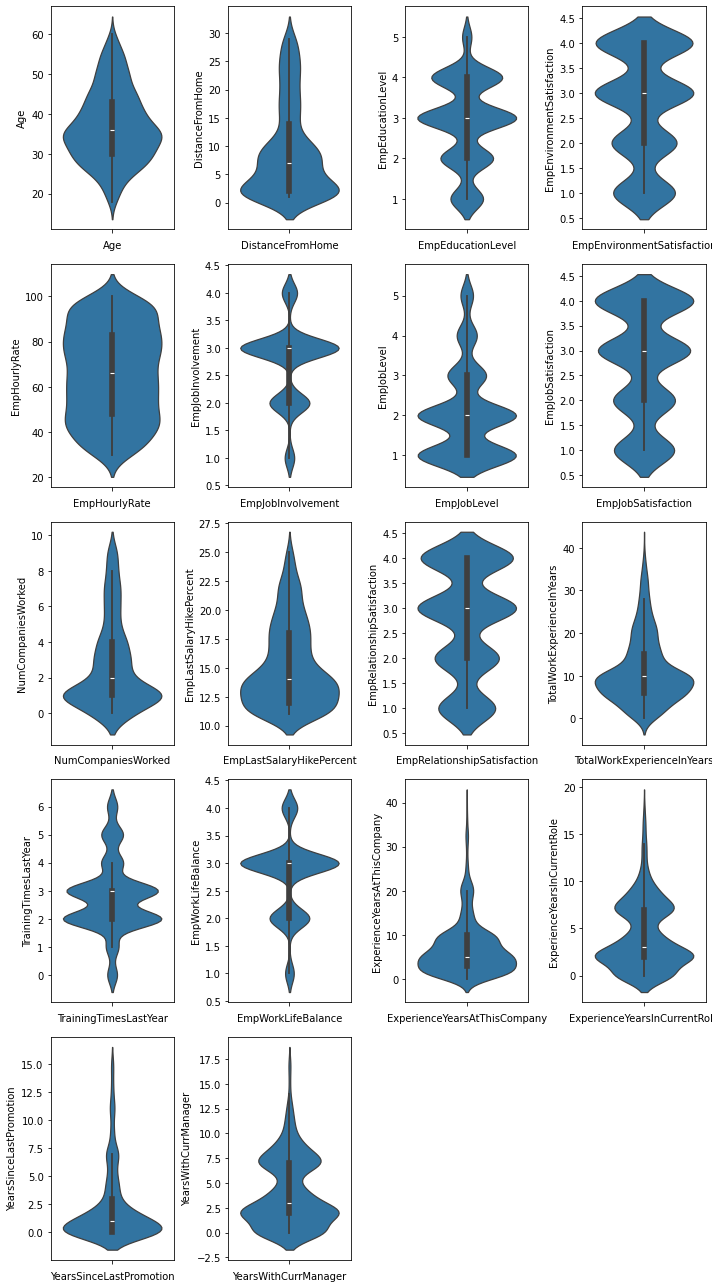

In [17]:
plt.figure(figsize =(10,18))
pltnum = 1

for col in numerical_column:
    if pltnum <= 20:
        ax=plt.subplot(5,4,pltnum)
        sns.violinplot(df[col])
        plt.xlabel(col)
        pltnum += 1
plt.tight_layout()
plt.show()

In [18]:
# handling outliers
# numerical columns with outliers are saved in the variable

columns_with_outlier = ['NumCompaniesWorked','TotalWorkExperienceInYears'
                        ,'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole'
                        ,'YearsSinceLastPromotion','YearsWithCurrManager']

for col in columns_with_outlier:
    IQR = stats.iqr(df[col],interpolation='midpoint')

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    upper_limit = Q1 + 1.5*IQR
    lower_limit = Q3 - 1.5*IQR

    df[col] = np.where(df[col] > upper_limit, df[col].median(), df[col])
    df[col] = np.where(df[col] < lower_limit, df[col].median(), df[col])

### Encoding

In [19]:
for col in categorical_column:
    print(f'{df[col].value_counts()}')
    print('-'*30)

Gender
Male      725
Female    475
Name: count, dtype: int64
------------------------------
EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64
------------------------------
MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64
------------------------------
EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64
------------------------------
EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Res

The categorical columns are manually encoded according to the value counts

In [20]:
for col in categorical_column:
    val_counts = df[col].value_counts()
    max_department = val_counts.idxmax()

    # Create a mapping dictionary based on the order of counts
    encoding_dict = {department: i+1 for i, department in enumerate(val_counts.index)}

    # Apply the manual encoding 
    df[col] = df[col].map(encoding_dict)


In [21]:
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,3,2,1,1,1,10,3,4,...,4,10.0,2,2,10.0,7.0,0.0,8.0,1,3
1,47,1,3,2,1,1,1,14,4,4,...,4,10.0,2,3,7.0,7.0,1.0,7.0,1,3
2,40,1,1,1,1,1,2,5,4,4,...,3,10.0,2,3,5.0,3.0,1.0,3.0,1,4
3,41,1,6,3,4,8,1,10,4,2,...,2,10.0,2,2,5.0,6.0,1.0,6.0,1,3
4,60,1,3,2,1,1,1,16,4,1,...,4,10.0,1,3,2.0,2.0,2.0,2.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,2,2,3,1,1,2,3,1,4,...,2,6.0,3,3,6.0,5.0,0.0,4.0,1,4
1196,37,1,1,2,2,7,1,10,2,4,...,1,4.0,2,3,1.0,0.0,0.0,0.0,1,3
1197,50,1,2,1,2,7,1,28,1,4,...,3,10.0,3,3,5.0,8.0,3.0,8.0,1,3
1198,34,2,2,2,6,14,1,9,3,4,...,2,9.0,3,4,8.0,7.0,1.0,7.0,1,3


### Feature Selection

In [22]:
#  Checking the feature importance using algorithm

model = CatBoostClassifier()

model.fit(df, df['PerformanceRating'])

feature_importance_catboost = model.get_feature_importance()

# Create a DataFrame with feature names and their importance scores
feature_importance_df_catboost = pd.DataFrame({'Feature': df.columns, 'Importance': feature_importance_catboost})

# Sort the DataFrame by importance in descending order
feature_importance_df_catboost = feature_importance_df_catboost.sort_values(by='Importance', ascending=False)

# Print or return the top features
print("Top Features - CatBoost:")
# feature_importance_df_catboost = feature_importance_df_catboost.head()
feature_importance_df_catboost

Learning rate set to 0.079866
0:	learn: 0.9636841	total: 162ms	remaining: 2m 41s
1:	learn: 0.8553149	total: 164ms	remaining: 1m 22s
2:	learn: 0.7635339	total: 167ms	remaining: 55.5s
3:	learn: 0.6848981	total: 170ms	remaining: 42.3s
4:	learn: 0.6192362	total: 172ms	remaining: 34.3s
5:	learn: 0.5612231	total: 176ms	remaining: 29.2s
6:	learn: 0.5149622	total: 179ms	remaining: 25.4s
7:	learn: 0.4682073	total: 184ms	remaining: 22.8s
8:	learn: 0.4301834	total: 186ms	remaining: 20.5s
9:	learn: 0.3941493	total: 190ms	remaining: 18.8s
10:	learn: 0.3614319	total: 195ms	remaining: 17.5s
11:	learn: 0.3323404	total: 198ms	remaining: 16.3s
12:	learn: 0.3068631	total: 203ms	remaining: 15.4s
13:	learn: 0.2825651	total: 208ms	remaining: 14.6s
14:	learn: 0.2614185	total: 211ms	remaining: 13.8s
15:	learn: 0.2433564	total: 216ms	remaining: 13.3s
16:	learn: 0.2249631	total: 220ms	remaining: 12.7s
17:	learn: 0.2093506	total: 224ms	remaining: 12.2s
18:	learn: 0.1919865	total: 228ms	remaining: 11.8s
19:	learn

,Feature,Importance
26,PerformanceRating,92.413795
11,EmpJobInvolvement,0.663355
16,EmpLastSalaryHikePercent,0.584888
20,EmpWorkLifeBalance,0.581429
6,BusinessTravelFrequency,0.555445
21,ExperienceYearsAtThisCompany,0.528579
18,TotalWorkExperienceInYears,0.486325
2,EducationBackground,0.413036
8,EmpEducationLevel,0.338583
9,EmpEnvironmentSatisfaction,0.333076


In [23]:
# Dropping features wit score<0.1
df.drop(columns=['EmpJobSatisfaction','OverTime','Gender'],axis=1,inplace=True)

### Balancing the data

In [24]:
print('Percentage of unique values in target : \n')
print(df['PerformanceRating'].value_counts()/len(df['PerformanceRating'])*100)

Percentage of unique values in target : 

PerformanceRating
3    72.833333
2    16.166667
4    11.000000
Name: count, dtype: float64


In [25]:
print('Count of unique values in target : \n')
print(df['PerformanceRating'].value_counts())

Count of unique values in target : 

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64


In [26]:
X = df.drop(columns=['PerformanceRating'])
y = df['PerformanceRating']

In [27]:
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

In [28]:
print('Count of unique values in target : \n')
print(y_sm.value_counts())

Count of unique values in target : 

PerformanceRating
3    874
4    874
2    874
Name: count, dtype: int64


### Saving the processed data

In [29]:
df.to_csv('data\\processed\\processed_data.csv',index=False)

In [30]:
X_sm.to_csv('data\\processed\\Independent_variables.csv',index=False)

In [31]:
y_sm.to_csv('data\\processed\\target_variables.csv',index=False)